__Ridge regression algorithm__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes
dia=load_diabetes()

In [3]:
dir(dia)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [4]:
df=pd.DataFrame(dia.data,columns=dia.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


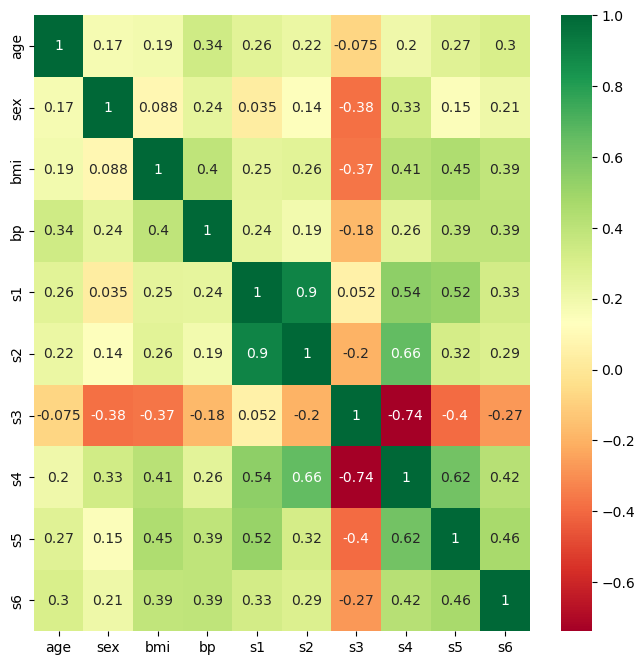

In [5]:
corr = df.corr()     
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

In [6]:
df['target']=dia.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
x=df.drop(['target'],axis='columns')
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [8]:
y=df.target
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20,random_state=10)

In [12]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [13]:
ridge=Ridge(alpha=0.1,solver='cholesky')
ridge.fit(x_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [14]:
ridge.score(x_test,y_test)

0.521125508563446

In [15]:
ridge.predict(x_test)

array([142.8807903 , 201.67718499, 183.10124204,  97.30581225,
       157.808407  , 134.19088847, 130.10389217, 253.4381527 ,
        85.11540159,  81.56804477, 118.70389414, 149.41913447,
       160.04848192,  97.47624485,  66.83875525, 216.37110573,
       138.97772046, 104.20699628, 198.48474776,  84.66233309,
       185.5354977 , 234.67563521,  85.49428657, 209.37713014,
        66.3646268 , 154.40312773, 156.25415441, 156.77152585,
       163.72809335, 110.08650736, 270.88585838, 180.75870853,
        67.13448162, 157.36379212, 213.91940266, 175.01772535,
        75.99976022, 178.86666503, 267.59752706, 187.66943565,
       198.62575985, 138.98798618, 207.76373364, 124.56373698,
        84.9205661 , 105.26217164,  86.80590654,  79.94761669,
       283.53602123, 131.74779701, 117.83922524, 147.00498869,
       105.0306766 , 218.022095  , 241.91210045,  99.60175048,
       122.8738898 , 144.2105916 , 192.06804954, 131.81938755,
       177.18385726, 111.62108345, 123.00494792,  99.38

In [16]:
y_test

119    200.0
207    202.0
236     67.0
288     80.0
174    151.0
       ...  
37     276.0
66     150.0
305    124.0
308    114.0
12     179.0
Name: target, Length: 89, dtype: float64

In [17]:
y_predict=ridge.predict(x_test)
r2_score(y_test,y_predict)

0.521125508563446

In [40]:
ridge1=Ridge(alpha=0.2,solver='cholesky')
ridge1.fit(x_train,y_train)

Ridge(alpha=0.2, solver='cholesky')

In [41]:
ridge1.score(x_test,y_test)

0.509923383578713

In [44]:
from sklearn.linear_model import  LinearRegression
reg1=LinearRegression()
reg1.fit(x_train,y_train)

LinearRegression()

In [45]:
reg1.score(x_test,y_test)

0.5341988244945843

In [46]:
reg1.score(x_train,y_train)

0.5122948233206475

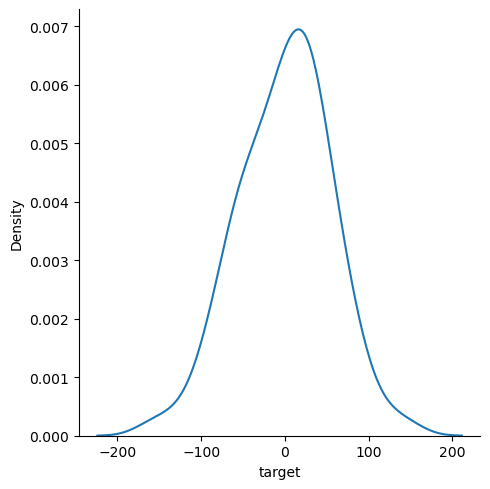

In [55]:
ridge_pred=ridge.predict(x_test)
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

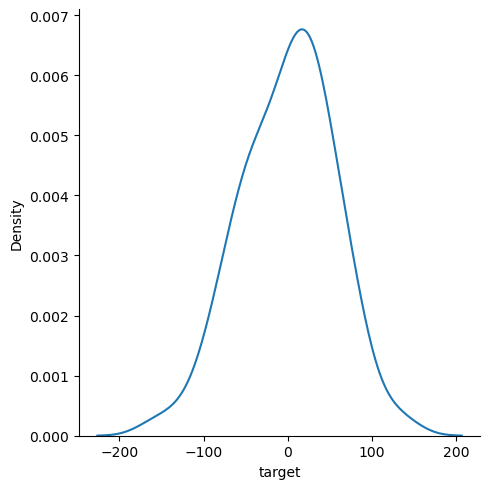

In [56]:
ridge1_pred=ridge1.predict(x_test)
import seaborn as sns
sns.displot(ridge1_pred-y_test,kind='kde')

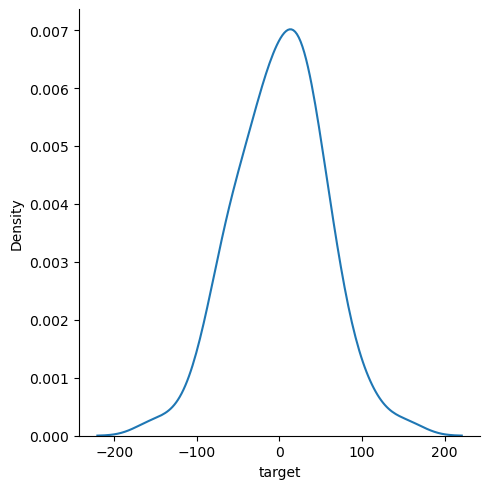

In [57]:
reg1_pred=reg1.predict(x_test)
import seaborn as sns
sns.displot(reg1_pred-y_test,kind='kde')

__lasso regression algorithm__

In [58]:
from sklearn.linear_model import Lasso
reg2=Lasso(alpha=0.1)
reg2.fit(x_train,y_train)

Lasso(alpha=0.1)

In [59]:
reg2.score(x_test,y_test)

0.5163983130279322

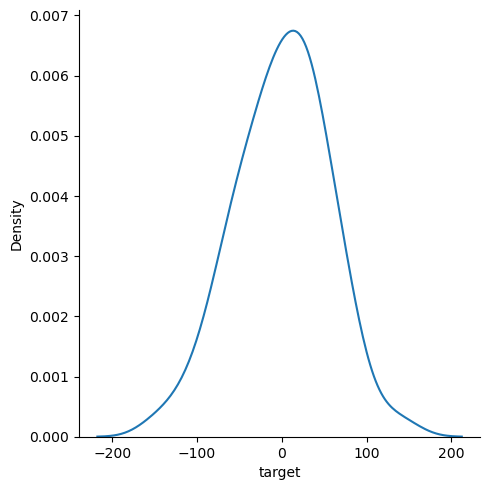

In [60]:
reg2_pred=reg2.predict(x_test)
import seaborn as sns
sns.displot(reg2_pred-y_test,kind='kde')

In [62]:
r2_score(y_test,reg2_pred)

0.5163983130279322